## Business Type & Details

Airbnb is a fast growing company which enables people to get a nice supplementary income by renting their property.

The company can provide the people thinking to join as hosts with useful insights about the revenu potential of their property and with tools that can predict the rental price based on objective characteristics of the property, such as number of bedrooms, amenities, and property location. The availability of such help can significantly increase the number of new hosts and produce the positive impact on company's revenue.

Then the following insights will be obtained and illustrated:

What is the Estimated Property revenue in different Seattle neighbourhoods?
What are the busiest months for renters?
This can help the hosts with planning the property maintenance.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import seaborn as sns
import numpy as np
import os
%pylab inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.preprocessing import LabelEncoder
import sklearn

## Data Description

This Dataset has two tables. One is for hosting information. The other is for reviews. 

The hosting information table has 3818 rows and each hosting has 92 attributes . 

The review table has 84849 rows and each review has 6 attributes.

Rent information table has 5 groups of attributes:
1) host information:
host_id, host_is_superhost, host_response_time, host_response_rate, host_identity_verified,...

2) rent information:
price, name, description, neighborhood, smart_location, property_type, bedrooms, bathrooms,...

3) review information:
first_review, last_review, review_scores_rating, number_of_reviews,...

4) policy information:
requires_license, cancellation_policy,require_guest_profile_picture,...

Review information table has 6 attributes:
listing_id

2) id
3) date: review date.
4) reviewer_id
5) reviewer_name
6) comments

In [3]:
lst=pd.read_csv('listings.csv')

In [51]:
lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

##### Visualising Missing Value Proportions

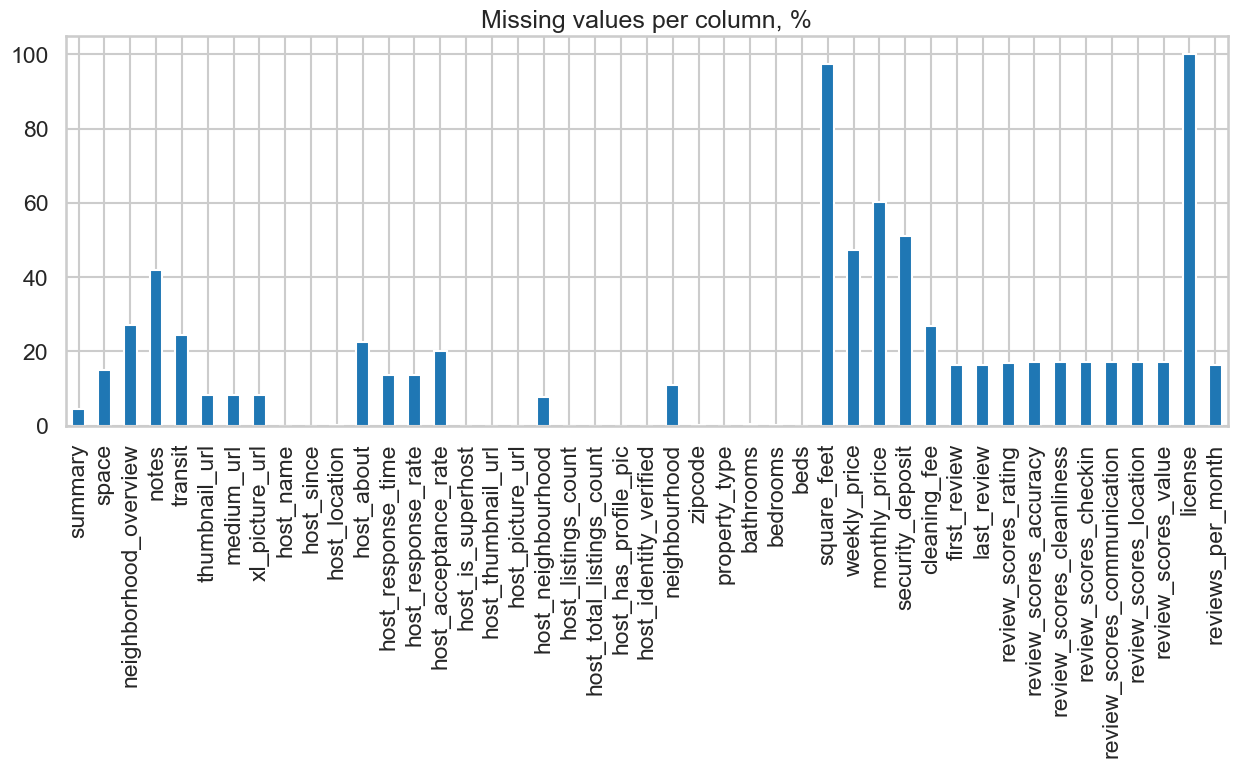

In [53]:
#find percentage of missing values for each column
listings_missing_df = lst.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0]

#plot the results
listings_columns_with_nan.plot.bar(title='Missing values per column, %',x='Columns',y='Missing percentage',figsize=(15,5));
     

In [4]:
#Non-Infromative Columns
df = lst.drop(['listing_url', 'scrape_id', 'name', 'summary', 'space', 'description', 
               'experiences_offered', 'neighborhood_overview', 'notes', 'thumbnail_url', 'medium_url', 
               'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name',  
               'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'street',
               'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'calendar_updated',
               'calendar_last_scraped',  'license', 'jurisdiction_names',
               'weekly_price','monthly_price','transit','id'], axis= 1)

In [5]:
df.head()

,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2016-01-04,2011-08-11,within a few hours,96%,100%,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",...,10.0,9.0,10.0,f,f,moderate,f,f,2,4.07
1,2016-01-04,2013-02-21,within an hour,98%,100%,t,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",...,10.0,10.0,10.0,f,f,strict,t,t,6,1.48
2,2016-01-04,2014-06-12,within a few hours,67%,100%,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",...,10.0,10.0,10.0,f,f,strict,f,f,2,1.15
3,2016-01-04,2013-11-06,NaN,NaN,NaN,f,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
4,2016-01-04,2011-11-29,within an hour,100%,NaN,f,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",...,10.0,9.0,9.0,f,f,strict,f,f,1,0.89


### Delete symbols and convert to numeric type

In [6]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%','')
df['host_acceptance_rate'] =df['host_acceptance_rate'].str.replace('%','')

In [7]:
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'])
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'])

In [8]:
df['price'] =df['price'].str.replace('$','')
df['security_deposit'] =df['security_deposit'].str.replace('$','')
df['cleaning_fee'] =df['cleaning_fee'].str.replace('$','')
df['extra_people'] =df['extra_people'].str.replace('$','')

In [9]:
df['price'] =df['price'].str.replace(',','')
df['security_deposit'] =df['security_deposit'].str.replace(',','')
df['cleaning_fee'] =df['cleaning_fee'].str.replace(',','')
df['extra_people'] =df['extra_people'].str.replace(',','')

In [10]:
df['security_deposit'] = pd.to_numeric(df['security_deposit'])
df['cleaning_fee'] = pd.to_numeric(df['cleaning_fee'])
df['price'] = pd.to_numeric(df['price'])
df['extra_people'] = pd.to_numeric(df['extra_people'])

### Check Outliers and Error

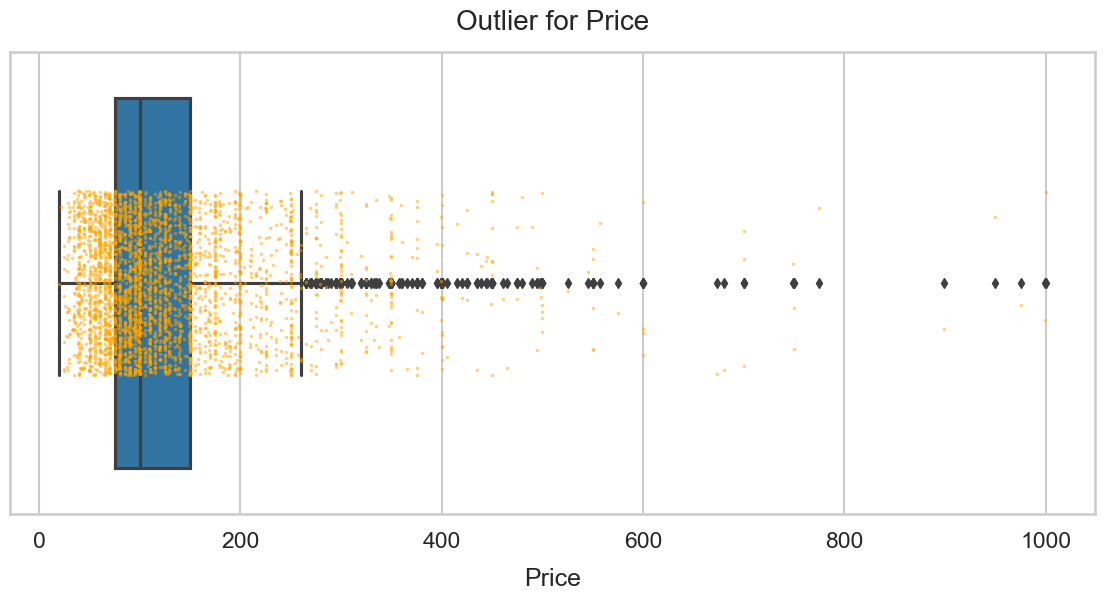

In [11]:
sns.set_context("talk")
sns.set_style("whitegrid")
plt.figure(figsize=(14,6))
sns.boxplot(x='price', data=df, orient='h')
sns.stripplot(x='price', data=df, color="orange", alpha=0.5, jitter=0.2, size=2.5)
plt.title("Outlier for Price", fontsize=20, y=1.03)
plt.xlabel("Price", fontsize=18, labelpad=12);
#plt.show()
#plt.savefig("image1.png");

In [12]:
df = df[df.price<800]

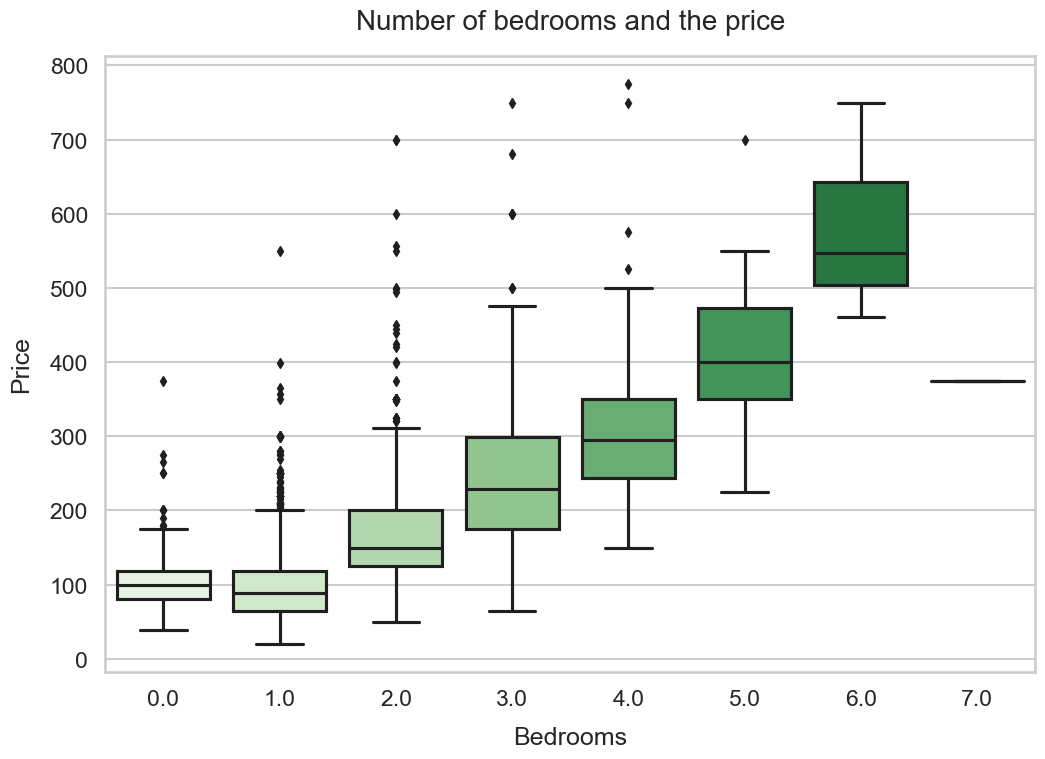

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(x="bedrooms", y="price", palette="Greens", data=df)
plt.title("Number of bedrooms and the price", fontsize=20, y=1.03)
plt.xlabel("Bedrooms", fontsize=18, labelpad=12)
plt.ylabel("Price", fontsize=18, labelpad=12);
#plt.savefig("image2.png");

The dataset only has one data point for seven bedrooms.

In [14]:
# Delete one outlier.
df = df[df.bedrooms<7] 

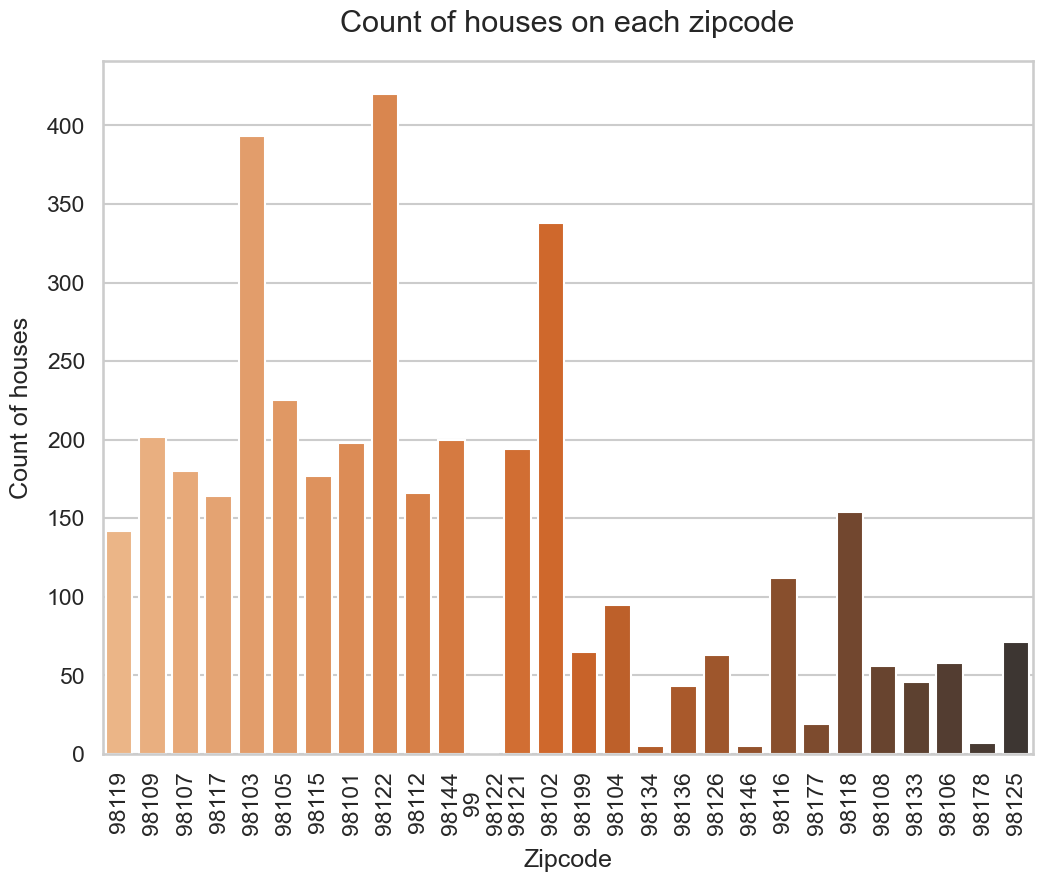

In [15]:
plt.figure(figsize=(12,9))
sns.countplot(x="zipcode", palette="Oranges_d", data=df)
plt.title("Count of houses on each zipcode", fontsize=22, y=1.03)
plt.xlabel("Zipcode", labelpad=10)
plt.ylabel("Count of houses", labelpad=10)
plt.xticks(rotation=90);
#plt.savefig("image3.png");

One zipcode seems like an error.

In [16]:
df = df.drop(df[(df['zipcode']== '99\n98122')].index)

### Create new variables: host_period, review_period

In [17]:
df['last_scraped'] = pd.to_datetime(df['last_scraped'])
df['host_since'] = pd.to_datetime(df['host_since'])

In [18]:
df['host_period'] = df['last_scraped']- df['host_since']
df['host_period'] = df['host_period'].dt.days

In [19]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['first_review'] = pd.to_datetime(df['first_review'])

In [20]:
df['review_period'] = df['last_review']- df['first_review']
df['review_period'] = df['review_period'].dt.days

In [21]:
df = df.drop(['last_scraped','host_since','last_review','first_review'], axis = 1)

## Plot data with cleaned data

### Plot map with location and house price

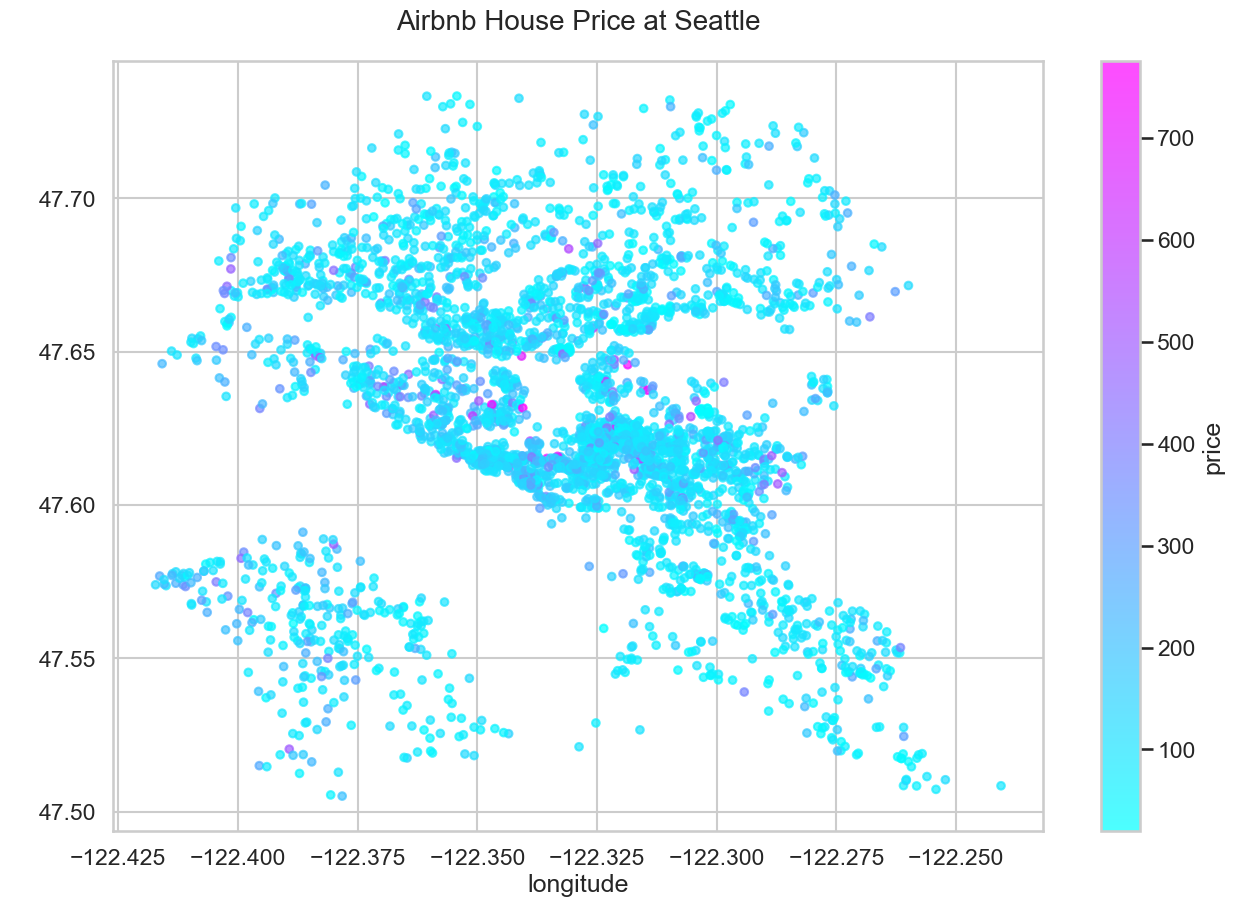

In [22]:
df.plot(kind="scatter", x="longitude", y="latitude",
    c="price", cmap="cool", s= 30,
    colorbar=True, alpha=0.7, figsize=(15,10),
)
plt.title('Airbnb House Price at Seattle', fontsize=20, y=1.03)
plt.ylabel(" ");
#plt.savefig("image4.png");

### Plot property type and price

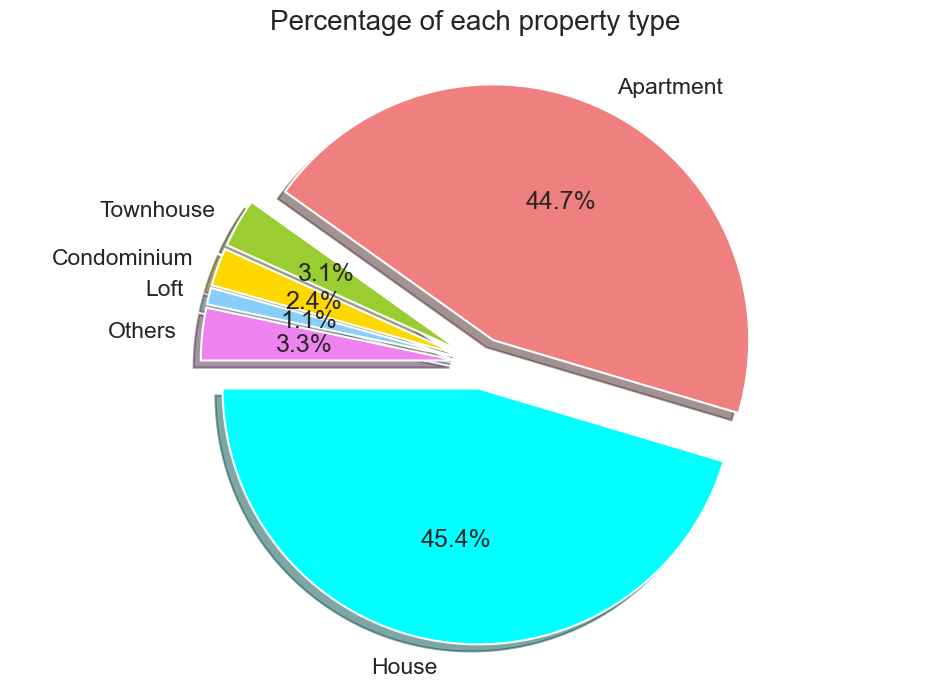

In [23]:
labels = 'House', 'Apartment', 'Townhouse', 'Condominium', "Loft", "Others"
sizes = [1727, 1702, 118, 91, 40, 126]
colors = ['cyan','lightcoral', 'yellowgreen', 'gold', 'lightskyblue', "violet"]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # explode 1st slice
 
# Plot
plt.figure(figsize=(12,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.title("Percentage of each property type", fontsize=20, y=1.03)
plt.axis('equal');
#plt.savefig("image5.png");

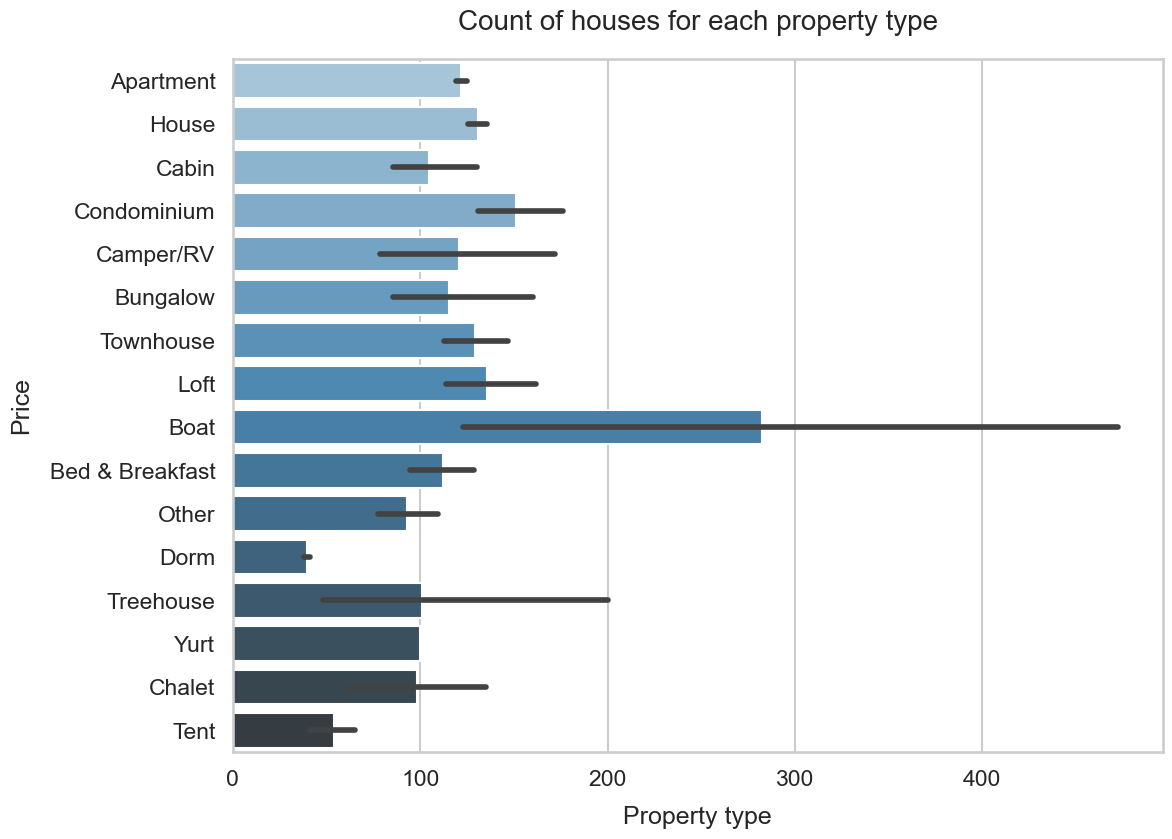

In [24]:
plt.figure(figsize=(12,9))
sns.barplot(x="price", y="property_type", palette="Blues_d", data=df)
plt.title("Count of houses for each property type", fontsize=20, y=1.03)
plt.xlabel("Property type", fontsize=18, labelpad=12)
plt.ylabel("Price", fontsize=18, labelpad=12);
#plt.savefig("image6.png");

Property type Boat owns the biggest price variance. The highest price is much higher than others

### Plot room type and price

In [25]:
roomtype_and_price = df.groupby("room_type").agg({"price": "mean"}).reset_index()

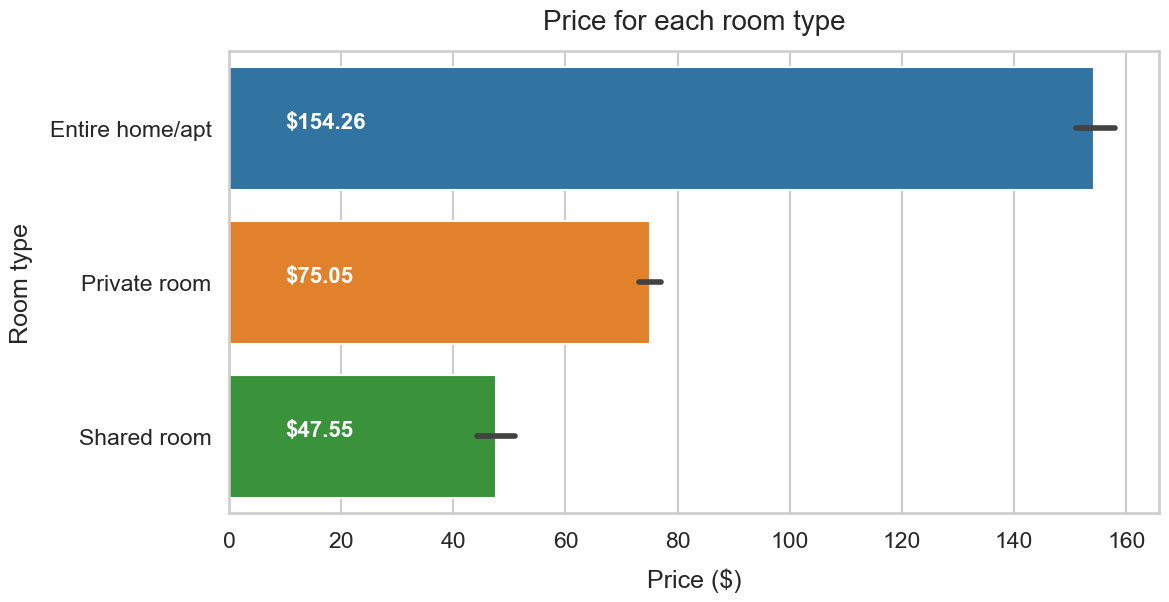

In [26]:
sns.set_context("talk")
plt.figure(figsize=(12,6))
ax= sns.barplot(x='price', y="room_type", data=df, orient='h')
plt.title("Price for each room type", fontsize=20, y=1.03)
plt.xlabel("Price ($)", fontsize=18, labelpad=12)
for index, row in roomtype_and_price.iterrows():
    ax.text(10, index, '$'+ str(round(row["price"],2)), color="white", weight="bold", fontsize=16)
plt.ylabel("Room type", fontsize=18, labelpad=12);
#plt.savefig("image7.png");

### Plot number_of_reviews and price

In [27]:
df['number_of_reviews_bins'] = pd.cut(df['number_of_reviews'], bins = [0,2,9,26,474])

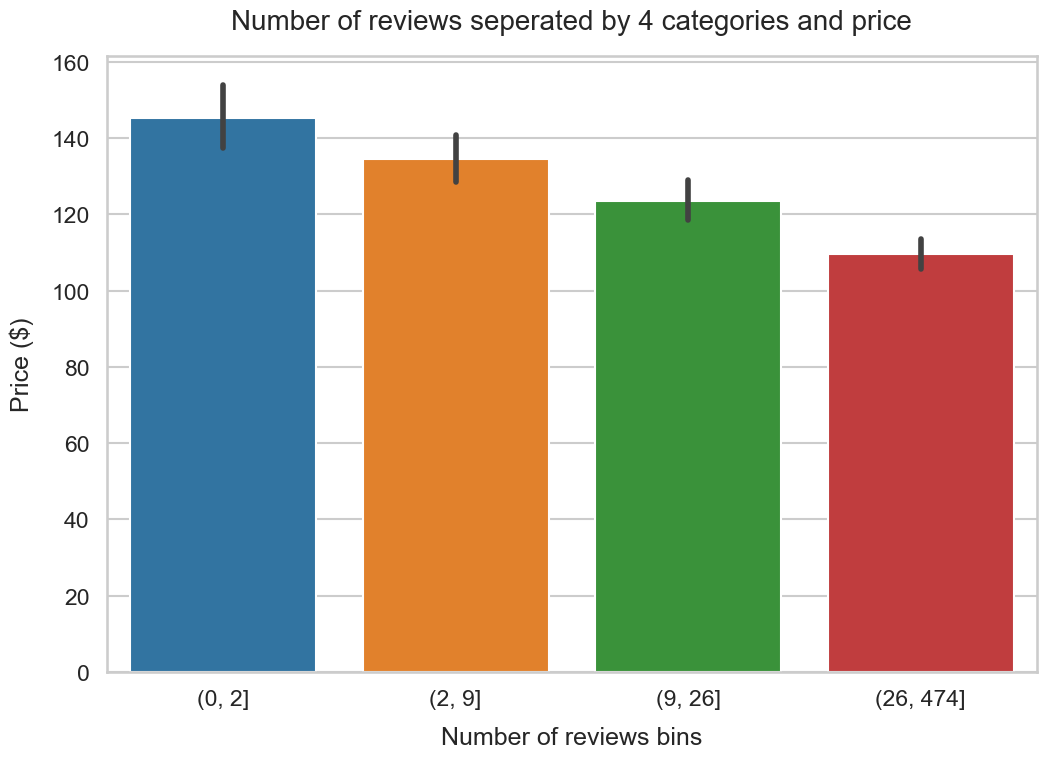

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(x="number_of_reviews_bins", y="price", data=df)
plt.title("Number of reviews seperated by 4 categories and price", fontsize=20, y=1.03)
plt.xlabel("Number of reviews bins", fontsize=18, labelpad=12)
plt.ylabel("Price ($)", fontsize=18, labelpad=12);
#plt.savefig("image8.png");

### Plot cancellation policy and price

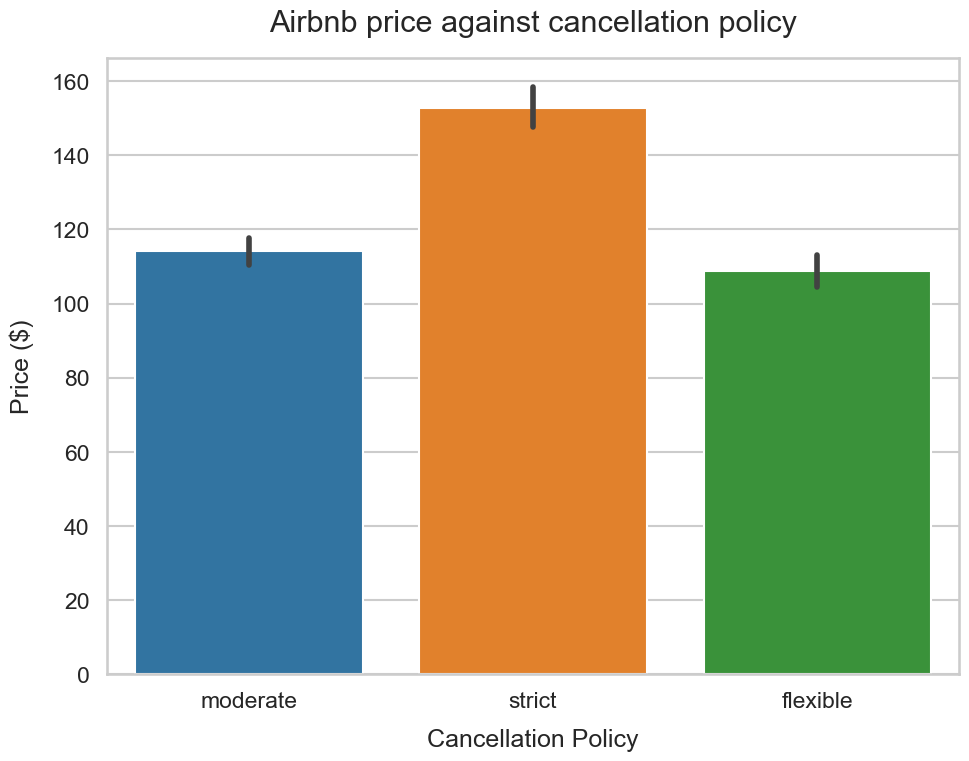

In [30]:
plt.figure(figsize=(11,8))
sns.barplot(x='cancellation_policy', y = 'price', data = df)
plt.title("Airbnb price against cancellation policy", fontsize=22, y=1.03)
plt.ylabel("Price ($)", labelpad=12)
plt.xlabel("Cancellation Policy", labelpad=12);
#plt.savefig("image12.png");

### Deal with missing value and get dummy variables

In [31]:
cols= ['review_scores_rating','review_scores_accuracy',
               'review_scores_cleanliness','review_scores_checkin',
                'review_scores_communication','review_scores_location',
               'review_scores_value','reviews_per_month','review_period']
mask = df.number_of_reviews == 0
df.loc[mask,cols]=0

In [ ]:
#numerical_cols = ['bathrooms', 'bedrooms', 'beds', 'accommodates']
#features_df = listings_df[numerical_cols].apply( lambda col: col.fillna(col.median()) ) 

In [32]:
df = df.drop(['square_feet'], axis= 1)

In [33]:
df['superhost']=np.where(df['host_is_superhost']=='t',1,0)
df.drop('host_is_superhost',axis =1 , inplace = True)

In [34]:
df['instantbook']=np.where(df['instant_bookable']=='t',1,0)
df.drop('instant_bookable',axis =1 , inplace = True)

In [35]:
df_ori = df.copy()

In [36]:
df = pd.get_dummies(data = df, columns = ['host_neighbourhood','host_has_profile_pic',
                                          'host_identity_verified','neighbourhood',
                                          'neighbourhood_cleansed',
                                          'neighbourhood_group_cleansed', 'zipcode',
                                          'is_location_exact', 'property_type',
                                          'room_type', 'bed_type', 'cancellation_policy',
                                          'require_guest_profile_picture',
                                          'require_guest_phone_verification',
                                          'has_availability', 'requires_license',
                                          'host_response_time', 'number_of_reviews_bins'],dummy_na=True)

In [37]:
df = df.dropna()

In [38]:
len(df)

1369

### Coreelation Check

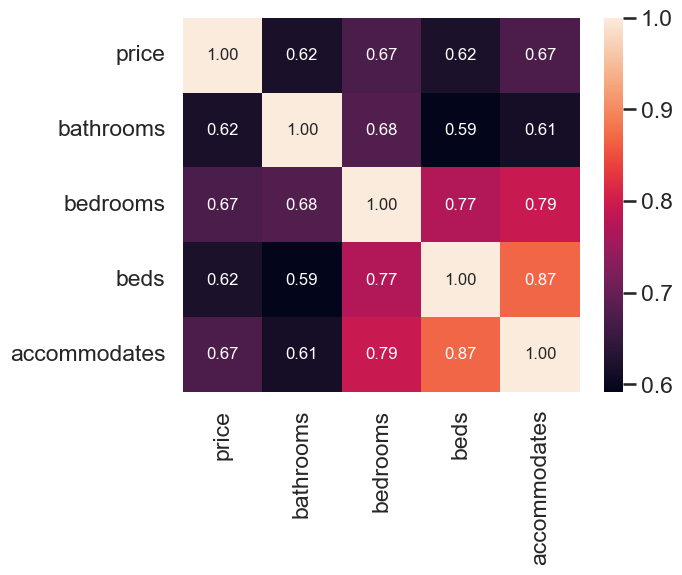

In [49]:
sns.heatmap(df[['price', 'bathrooms', 'bedrooms', 'beds','accommodates']].corr(), annot=True, fmt=".2f");

### Deal with host_verfications variable

In [39]:
df['email'] = df['host_verifications'].apply(lambda x: 1 if "email" in x else 0 )
df['phone'] = df['host_verifications'].apply(lambda x: 1 if "phone" in x else 0 )
df['facebook'] = df['host_verifications'].apply(lambda x: 1 if "facebook" in x else 0 )
df['google'] = df['host_verifications'].apply(lambda x: 1 if "google" in x else 0 )
df['linkedin'] = df['host_verifications'].apply(lambda x: 1 if "linkedin" in x else 0 )
df['reviews'] = df['host_verifications'].apply(lambda x: 1 if "reviews" in x else 0 )
df['jumio'] = df['host_verifications'].apply(lambda x: 1 if "jumio" in x else 0 )
df['kba'] = df['host_verifications'].apply(lambda x: 1 if "kba" in x else 0 )
df['manual_online'] = df['host_verifications'].apply(lambda x: 1 if "manual_online" in x else 0 )
df['manual_offline'] = df['host_verifications'].apply(lambda x: 1 if "manual_offline" in x else 0 )
df['sent_id'] = df['host_verifications'].apply(lambda x: 1 if "sent_id" in x else 0 )
df['amex'] = df['host_verifications'].apply(lambda x: 1 if "amex" in x else 0 )

In [40]:
df['TV'] = df['amenities'].apply(lambda x: 1 if ("TV"or"Cable TV") in x else 0 )
df['Internet'] = df['host_verifications'].apply(lambda x: 1 if "Internet" in x else 0 )
df['Air Conditioning'] = df['host_verifications'].apply(lambda x: 1 if "Air Conditioning" in x else 0 )
df['Kitchen'] = df['host_verifications'].apply(lambda x: 1 if "Kitchen" in x else 0 )
df['Heating'] = df['host_verifications'].apply(lambda x: 1 if "Heating" in x else 0 )
df['Family/Kid Friendly'] = df['host_verifications'].apply(lambda x: 1 if "Family/Kid Friendly" in x else 0 )
df['Washer'] = df['host_verifications'].apply(lambda x: 1 if "Washer" in x else 0 )
df['Dryer'] = df['host_verifications'].apply(lambda x: 1 if "Dryer" in x else 0 )
df['Free Parking on Premises'] = df['host_verifications'].apply(lambda x: 1 if "Free Parking on Premises" in x else 0 )
df['Smoke Detector'] = df['host_verifications'].apply(lambda x: 1 if "Smoke Detector" in x else 0 )
df['Carbon Monoxide Detector'] = df['host_verifications'].apply(lambda x: 1 if "Carbon Monoxide Detector" in x else 0 )
df['First Aid Kit'] = df['host_verifications'].apply(lambda x: 1 if "First Aid Kit" in x else 0 )
df['Safety Card'] = df['host_verifications'].apply(lambda x: 1 if "Safety Card" in x else 0 )
df['Fire Extinguisher'] = df['amenities'].apply(lambda x: 1 if "Fire Extinguisher" in x else 0 )
df['Essentials'] = df['host_verifications'].apply(lambda x: 1 if "Essentials" in x else 0 )
df['Shampoo'] = df['host_verifications'].apply(lambda x: 1 if "Shampoo" in x else 0 )
df['Breakfast'] = df['host_verifications'].apply(lambda x: 1 if "Breakfast" in x else 0 )
df['Pets live on this property'] = df['host_verifications'].apply(lambda x: 1 if "Pets live on this property" in x else 0 )
df['Hangers'] = df['host_verifications'].apply(lambda x: 1 if "Hangers" in x else 0 )
df['Hair Dryer'] = df['host_verifications'].apply(lambda x: 1 if "Hair Dryer" in x else 0 )
df['Laptop Friendly Workspace'] = df['host_verifications'].apply(lambda x: 1 if "Laptop Friendly Workspace" in x else 0 )
df['Elevator in Building'] = df['host_verifications'].apply(lambda x: 1 if "Elevator in Building" in x else 0 )
df['Hot Tub'] = df['host_verifications'].apply(lambda x: 1 if "Hot Tub" in x else 0 )
df['Indoor Fireplace'] = df['host_verifications'].apply(lambda x: 1 if "Indoor Fireplace" in x else 0 )
df['Buzzer/Wireless Intercom'] = df['host_verifications'].apply(lambda x: 1 if "Buzzer/Wireless Intercom" in x else 0 )
df['Iron'] = df['host_verifications'].apply(lambda x: 1 if "Iron" in x else 0 )

In [41]:
df = df.drop(['host_verifications','amenities'],axis=1)